In [1]:
from huggingface_hub import login
login()

Make plots for # of samples vs language

In [49]:
import datasets

glosslm = datasets.load_dataset("lecslab/glosslm", ignore_verifications=True)
df = glosslm['train'].to_pandas()
print(len(df.index))

/Users/lindiatjuatja/opt/miniconda3/envs/wav2gloss/lib/python3.9/site-packages/datasets/load.py:2097: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/453013 [00:00<?, ? examples/s]

453013


In [50]:
df_seg = df[df['is_segmented'] == 'yes']
df_unseg = df[df['is_segmented'] == 'no']
df_unk = df[df['is_segmented'] == '']

In [51]:
glottocode_df = df[df['glottocode'] != '']
unique_glottocodes = glottocode_df['glottocode'].unique()

print(glottocode_df)

                          ID glottocode                       transcription  \
0              st_arap1274_0   arap1274                               heebe   
1              st_arap1274_0   arap1274                               heebe   
2              st_arap1274_1   arap1274                                 hee   
3              st_arap1274_1   arap1274                                 hee   
4              st_arap1274_2   arap1274   nooxeihi' nih-'owoh-cee-ceneeni-n   
...                      ...        ...                                 ...   
453008  guarani_para1311_800   para1311     Ha ojojoguaiterei rupi hikuái ,   
453009  guarani_para1311_801   para1311  mavave nd-o-pillá-i la oi-kó -va ,   
453010  guarani_para1311_801   para1311       mavave ndopillái la oikó va ,   
453011  guarani_para1311_802   para1311        ha o-gana karumbe ñandú-pe .   
453012  guarani_para1311_802   para1311          ha ogana karumbe ñandúpe .   

                                                  g

In [52]:
import pandas as pd

seg_counts = []
unseg_counts = []
unk_counts = []
total_counts = []
for code in unique_glottocodes:
    seg_counts.append(len(df_seg[df_seg['glottocode'] == code].index))
    unseg_counts.append(len(df_unseg[df_unseg['glottocode'] == code].index))
    unk_counts.append(len(df_unk[df_unk['glottocode'] == code].index))
    
glottocode_df = pd.DataFrame({'glottocode': unique_glottocodes, 'seg_counts': seg_counts, 'unseg_counts': unseg_counts, 'unk_counts': unk_counts})
glottocode_df['total_counts'] = glottocode_df['seg_counts'] + glottocode_df['unseg_counts'] + glottocode_df['unk_counts']

print(glottocode_df.loc[glottocode_df['glottocode'] == 'arap1274'])

  glottocode  seg_counts  unseg_counts  unk_counts  total_counts
0   arap1274       48918         48918           0         97836


  glottocode  seg_counts  unseg_counts  unk_counts  total_counts  \
0   arap1274       48918         48918           0         97836   
2   lezg1247         880           880           1          1761   
3   natu1246         989           989           0          1978   
4   nyan1302        2626          2626           0          5252   
5   dido1241        4482          4620           1          9103   

                         family  
0              Algic [algi1248]  
2  Nakh-Daghestanian [nakh1245]  
3       Austronesian [aust1307]  
4     Atlantic-Congo [atla1278]  
5  Nakh-Daghestanian [nakh1245]  


/Users/lindiatjuatja/opt/miniconda3/envs/wav2gloss/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lindiatjuatja/opt/miniconda3/envs/wav2gloss/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, 'arap1274'),
 Text(1, 0, 'uspa1245'),
 Text(2, 0, 'dido1241'),
 Text(3, 0, 'japh1234'),
 Text(4, 0, 'nyan1302'),
 Text(5, 0, 'mauw1238'),
 Text(6, 0, 'sanz1248'),
 Text(7, 0, 'fwee1238'),
 Text(8, 0, 'gyel1242'),
 Text(9, 0, 'natu1246'),
 Text(10, 0, 'lezg1247'),
 Text(11, 0, 'phal1254'),
 Text(12, 0, 'para1311'),
 Text(13, 0, 'molo1266'),
 Text(14, 0, 'sout2972'),
 Text(15, 0, 'darg1241'),
 Text(16, 0, 'mati1253'),
 Text(17, 0, 'nucl1643'),
 Text(18, 0, 'kara1499'),
 Text(19, 0, 'wara1294'),
 Text(20, 0, 'pite1240'),
 Text(21, 0, 'mand1415'),
 Text(22, 0, 'russ1263'),
 Text(23, 0, 'kore1280'),
 Text(24, 0, 'akan1250'),
 Text(25, 0, 'nucl1301'),
 Text(26, 0, 'stan1288'),
 Text(27, 0, 'finn1318'),
 Text(28, 0, 'west2369'),
 Text(29, 0, 'stan1295'),
 Text(30, 0, 'swah1253'),
 Text(31, 0, 'stan1290'),
 Text(32, 0, 'papu1250'),
 Text(33, 0, 'stan1293'),
 Text(34, 0, 'fern1234'),
 Text(35, 0, 'hung1274'),
 Text(36, 0, 'yuca1254'),
 Text(37, 0, 'gree1276'),
 Text(38, 0, 'hebr1245

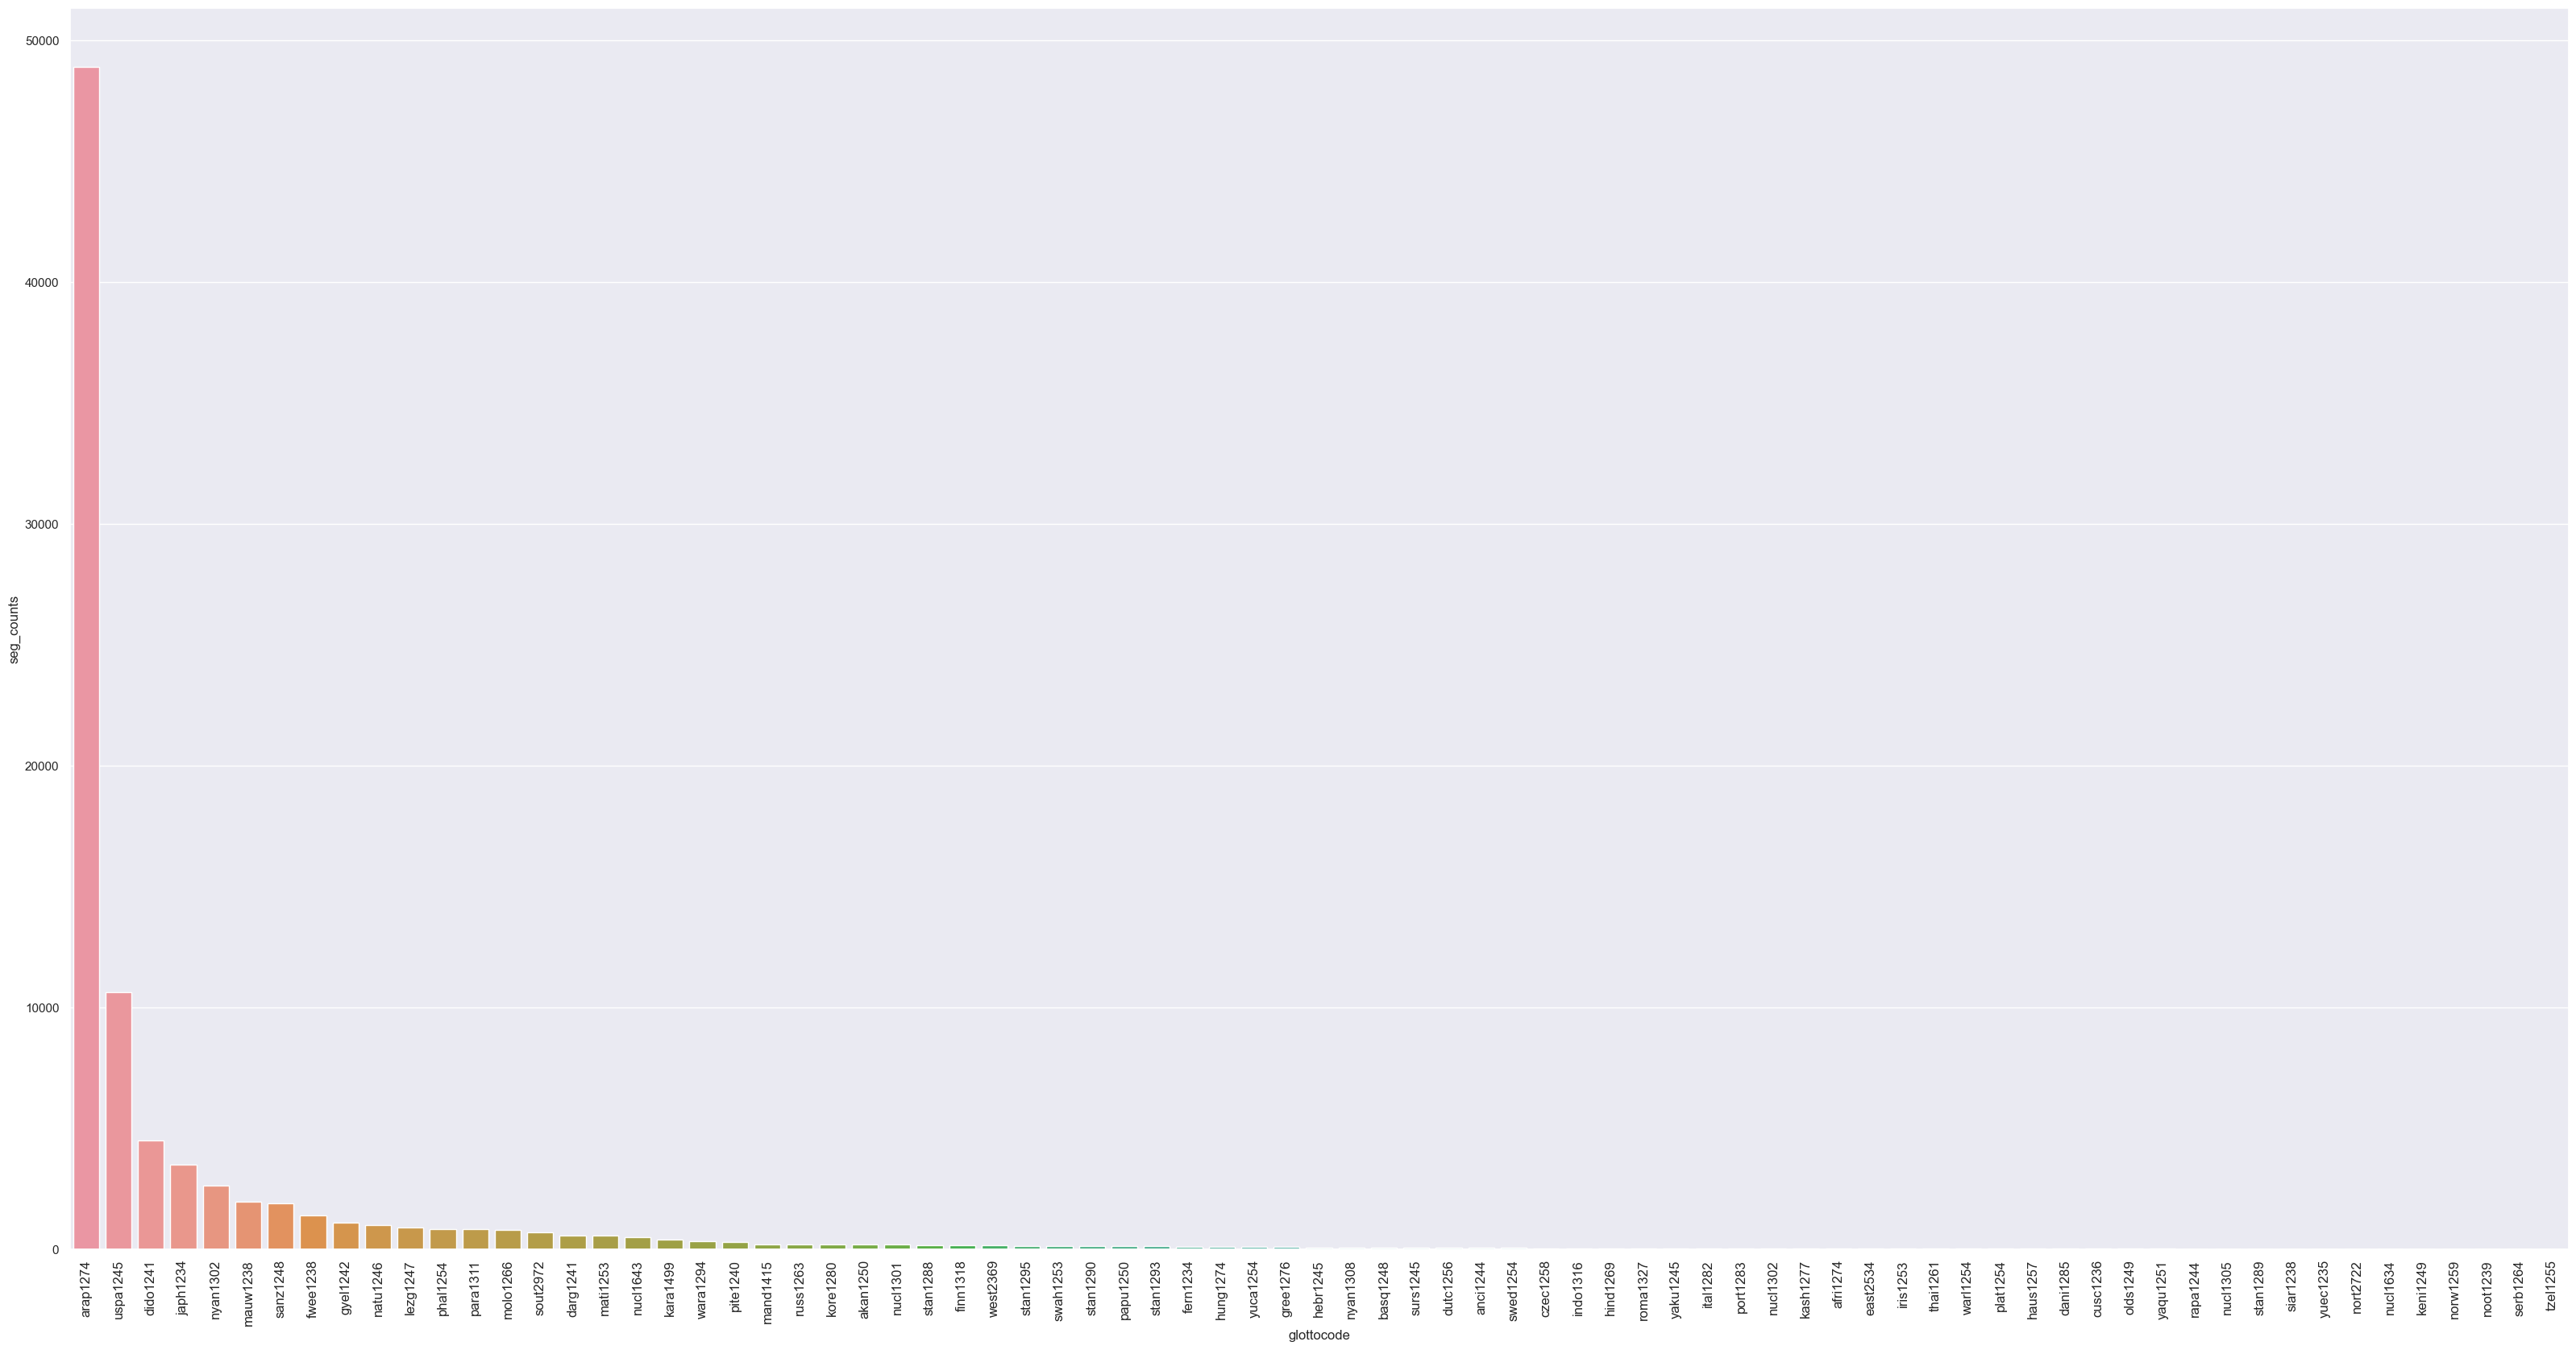

In [79]:
import seaborn as sns

sns.set(rc={'figure.figsize':(40,20)})
cutoff = 600
df_cutoff = glottocode_df[glottocode_df['total_counts'] > cutoff]
print(df_cutoff.head())

plt = sns.barplot(x=df_cutoff['glottocode'], y=df_cutoff['seg_counts'], order=df_cutoff.sort_values('seg_counts', ascending=False).glottocode)
plt.set_xticklabels(plt.get_xticklabels(), rotation=90, fontsize=12)

/Users/lindiatjuatja/opt/miniconda3/envs/wav2gloss/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lindiatjuatja/opt/miniconda3/envs/wav2gloss/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, 'arap1274'),
 Text(1, 0, 'uspa1245'),
 Text(2, 0, 'stan1295'),
 Text(3, 0, 'nucl1643'),
 Text(4, 0, 'mand1415'),
 Text(5, 0, 'stan1290'),
 Text(6, 0, 'kore1280'),
 Text(7, 0, 'russ1263'),
 Text(8, 0, 'haus1257'),
 Text(9, 0, 'stan1288'),
 Text(10, 0, 'finn1318'),
 Text(11, 0, 'dido1241'),
 Text(12, 0, 'norw1259'),
 Text(13, 0, 'hung1274'),
 Text(14, 0, 'ital1282'),
 Text(15, 0, 'dutc1256'),
 Text(16, 0, 'japh1234'),
 Text(17, 0, 'nucl1301'),
 Text(18, 0, 'indo1316'),
 Text(19, 0, 'nyan1302'),
 Text(20, 0, 'mauw1238'),
 Text(21, 0, 'basq1248'),
 Text(22, 0, 'plat1254'),
 Text(23, 0, 'serb1264'),
 Text(24, 0, 'sanz1248'),
 Text(25, 0, 'swed1254'),
 Text(26, 0, 'hebr1245'),
 Text(27, 0, 'west2369'),
 Text(28, 0, 'fwee1238'),
 Text(29, 0, 'hind1269'),
 Text(30, 0, 'warl1254'),
 Text(31, 0, 'stan1289'),
 Text(32, 0, 'dani1285'),
 Text(33, 0, 'nort2722'),
 Text(34, 0, 'yuca1254'),
 Text(35, 0, 'olds1249'),
 Text(36, 0, 'nucl1302'),
 Text(37, 0, 'iris1253'),
 Text(38, 0, 'gyel1242

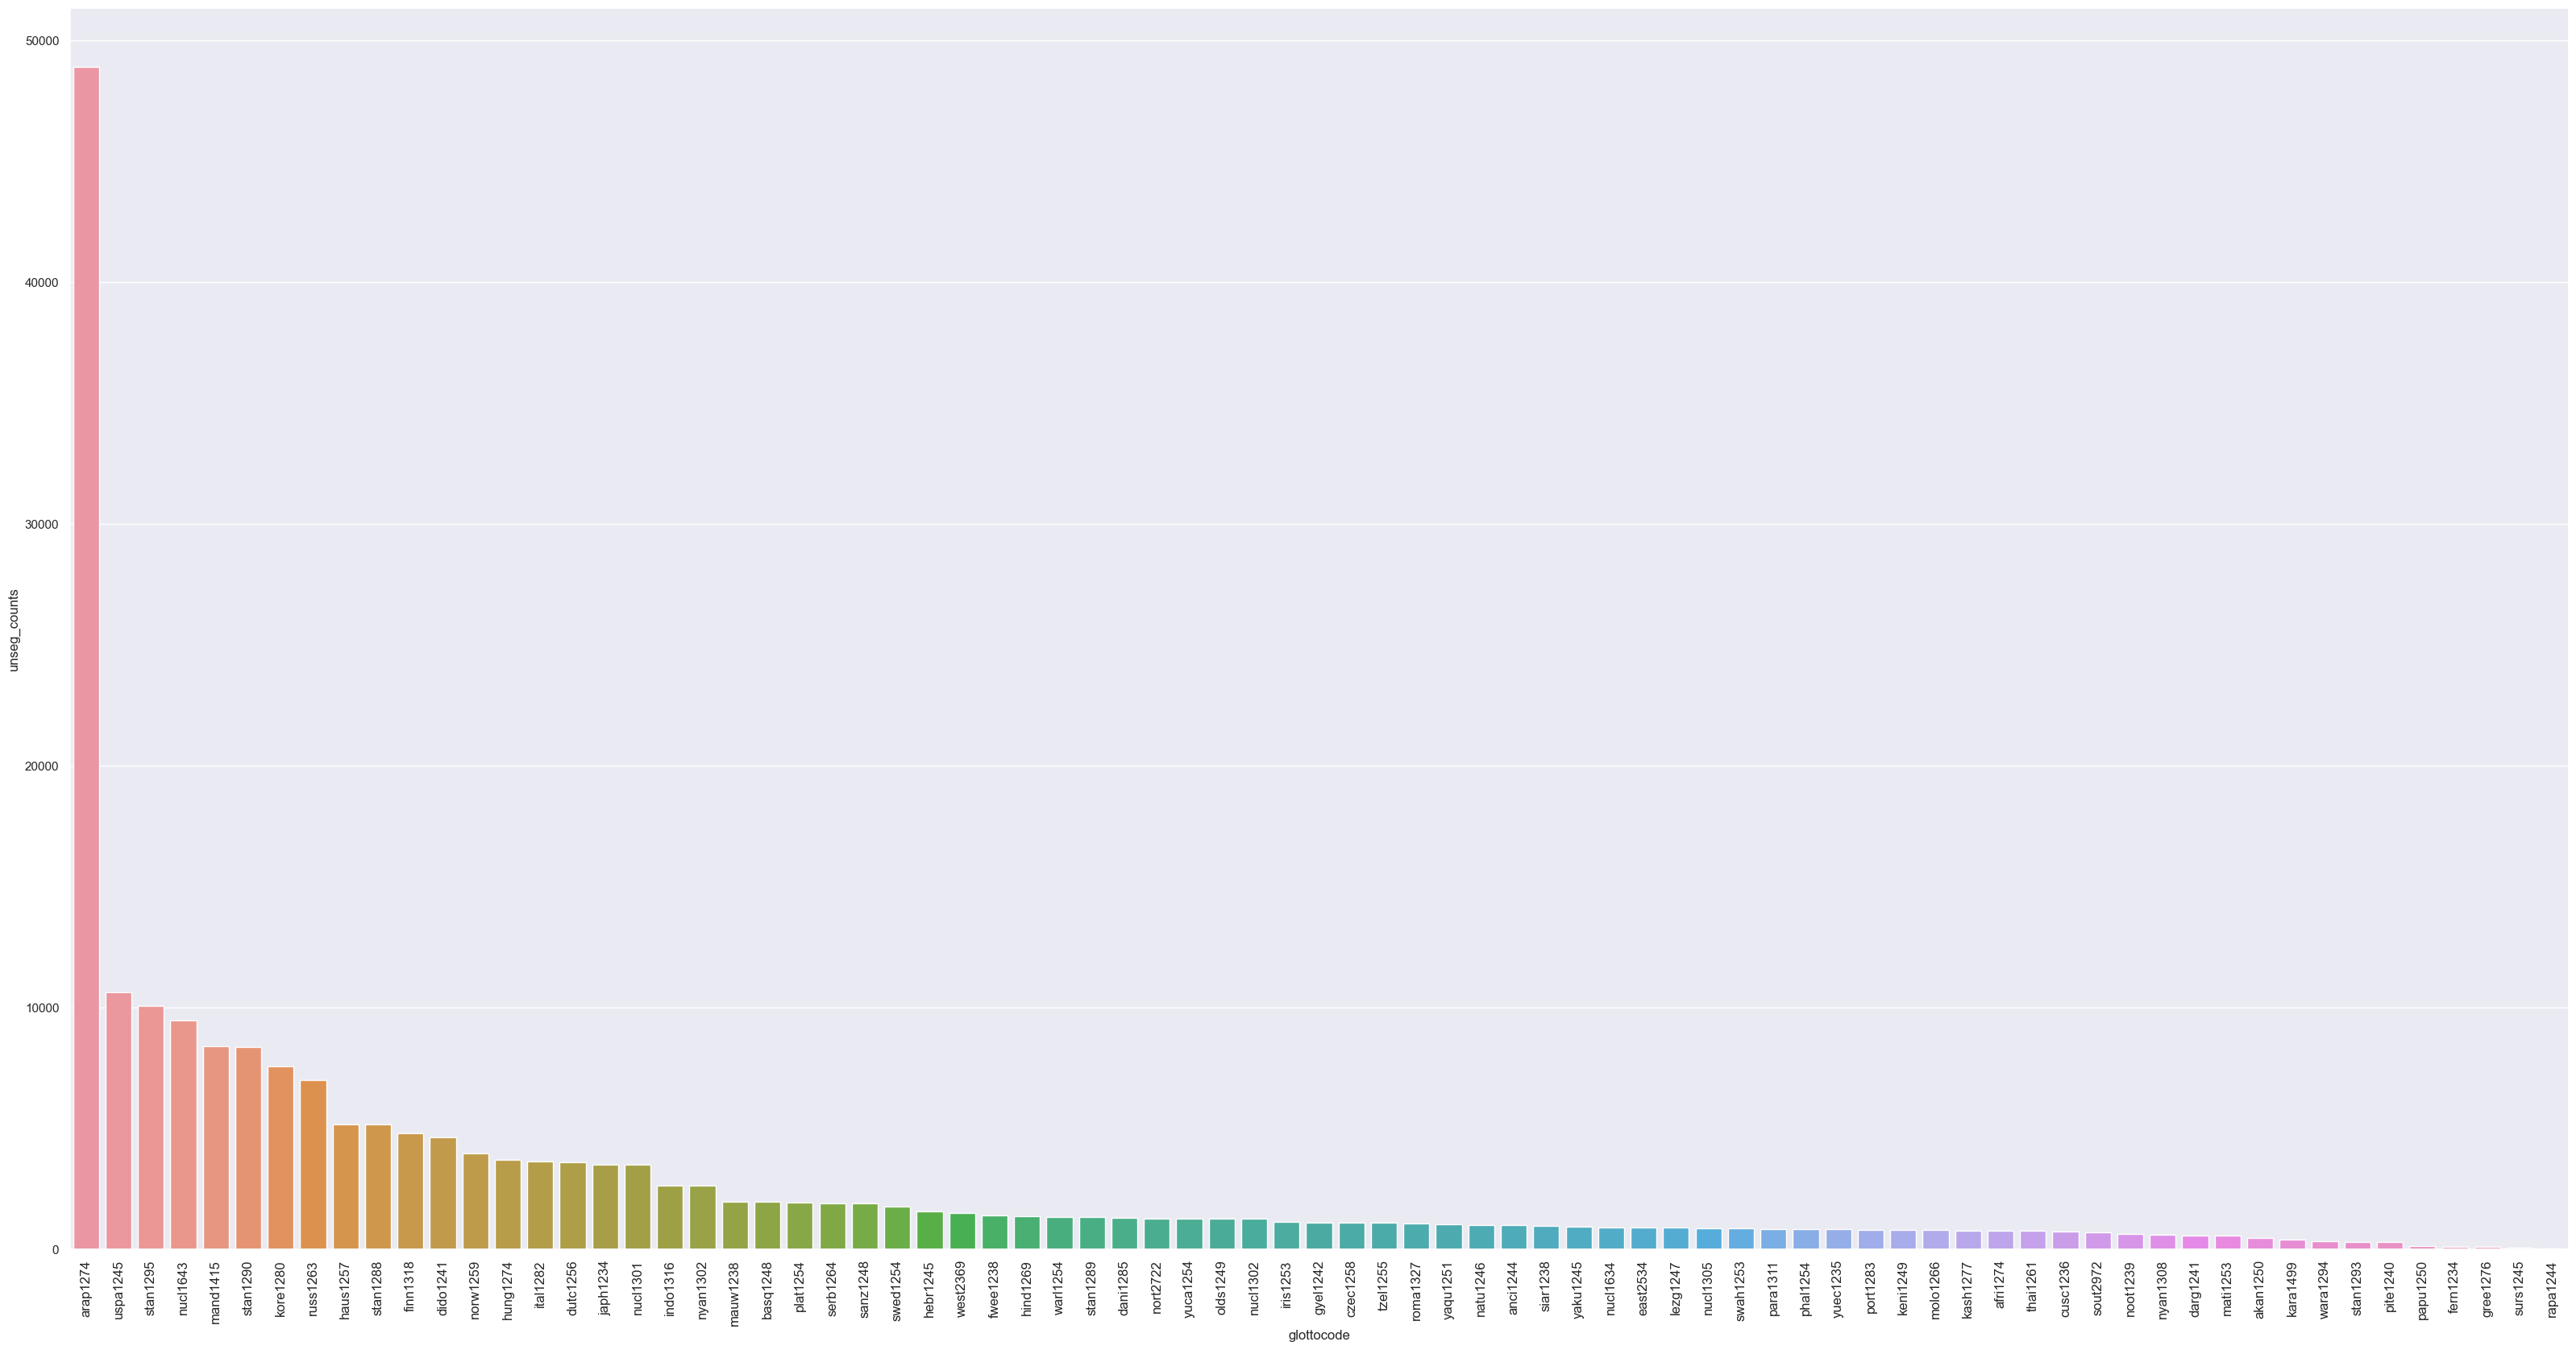

In [82]:
plt = sns.barplot(x=df_cutoff['glottocode'], y=df_cutoff['unseg_counts'], order=df_cutoff.sort_values('unseg_counts', ascending=False).glottocode)
plt.set_xticklabels(plt.get_xticklabels(), rotation=90, fontsize=12)

/Users/lindiatjuatja/opt/miniconda3/envs/wav2gloss/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lindiatjuatja/opt/miniconda3/envs/wav2gloss/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, 'stan1295'),
 Text(1, 0, 'fern1234'),
 Text(2, 0, 'papu1250'),
 Text(3, 0, 'rapa1244'),
 Text(4, 0, 'surs1245'),
 Text(5, 0, 'stan1290'),
 Text(6, 0, 'russ1263'),
 Text(7, 0, 'stan1288'),
 Text(8, 0, 'kara1499'),
 Text(9, 0, 'wara1294'),
 Text(10, 0, 'ital1282'),
 Text(11, 0, 'gree1276'),
 Text(12, 0, 'dutc1256'),
 Text(13, 0, 'swed1254'),
 Text(14, 0, 'mand1415'),
 Text(15, 0, 'stan1293'),
 Text(16, 0, 'gyel1242'),
 Text(17, 0, 'molo1266'),
 Text(18, 0, 'czec1258'),
 Text(19, 0, 'olds1249'),
 Text(20, 0, 'mauw1238'),
 Text(21, 0, 'hung1274'),
 Text(22, 0, 'roma1327'),
 Text(23, 0, 'finn1318'),
 Text(24, 0, 'sout2972'),
 Text(25, 0, 'stan1289'),
 Text(26, 0, 'dani1285'),
 Text(27, 0, 'akan1250'),
 Text(28, 0, 'hind1269'),
 Text(29, 0, 'west2369'),
 Text(30, 0, 'phal1254'),
 Text(31, 0, 'port1283'),
 Text(32, 0, 'nucl1643'),
 Text(33, 0, 'mati1253'),
 Text(34, 0, 'pite1240'),
 Text(35, 0, 'japh1234'),
 Text(36, 0, 'afri1274'),
 Text(37, 0, 'indo1316'),
 Text(38, 0, 'sanz1248

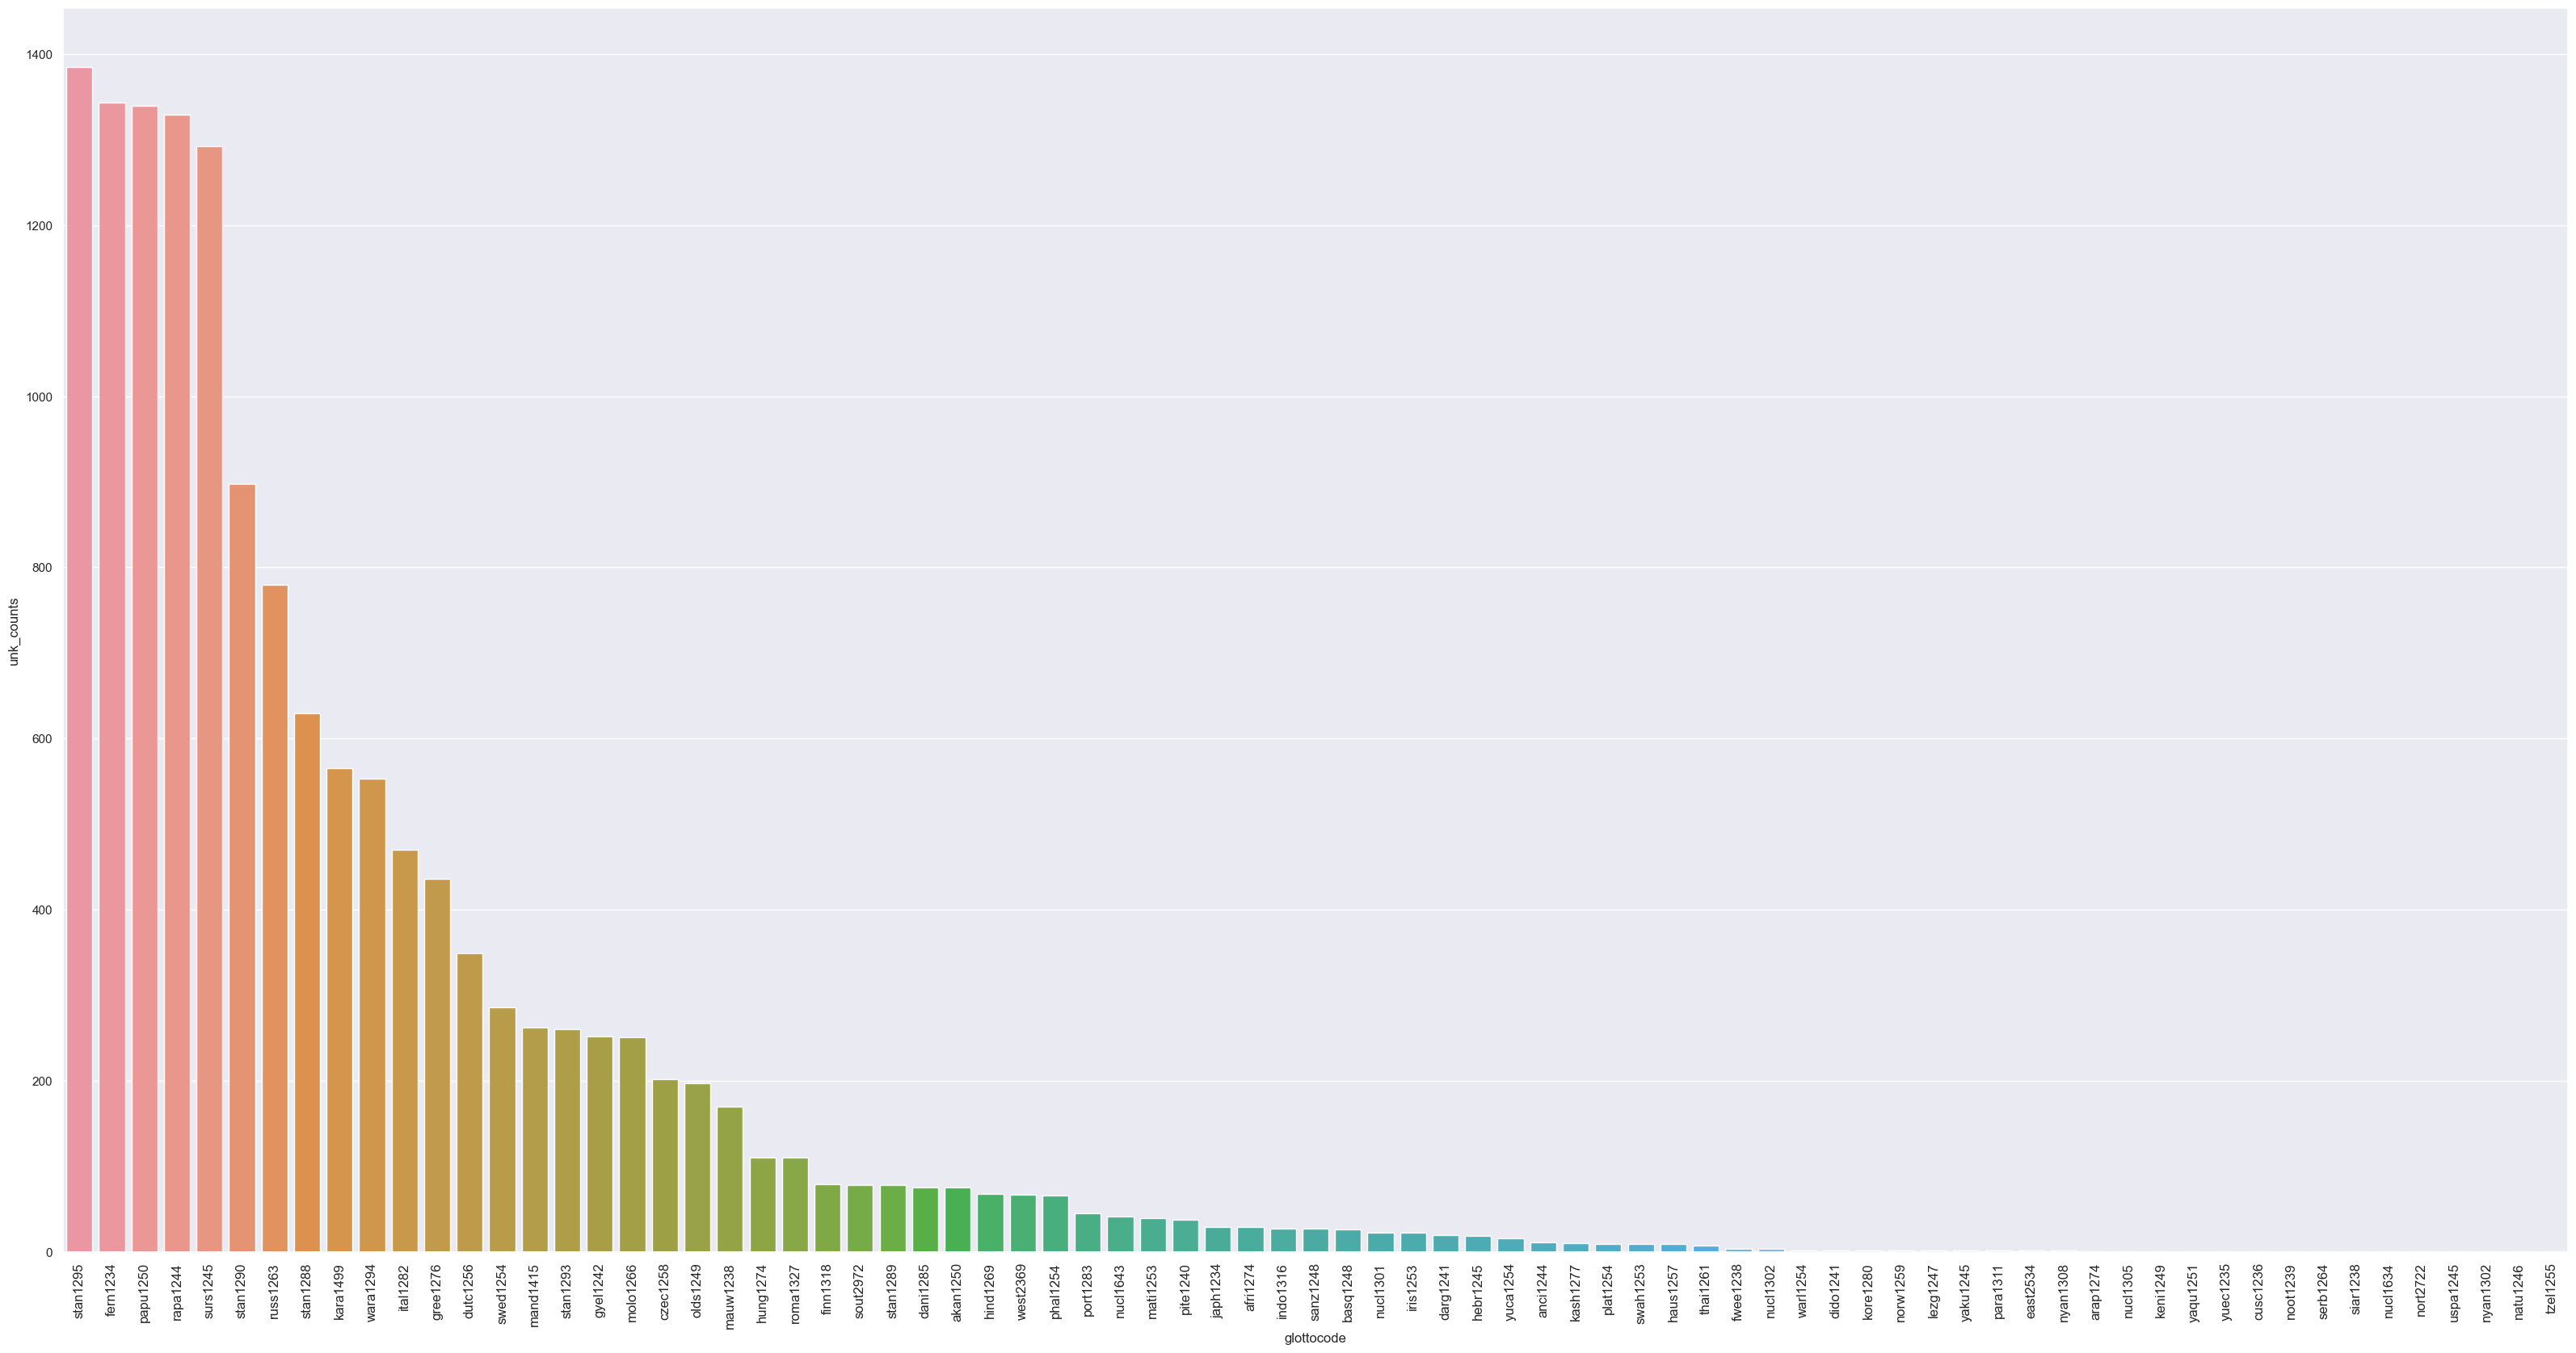

In [84]:
plt = sns.barplot(x=df_cutoff['glottocode'], y=df_cutoff['unk_counts'], order=df_cutoff.sort_values('unk_counts', ascending=False).glottocode)
plt.set_xticklabels(plt.get_xticklabels(), rotation=90, fontsize=12)

/Users/lindiatjuatja/opt/miniconda3/envs/wav2gloss/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lindiatjuatja/opt/miniconda3/envs/wav2gloss/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, 'arap1274'),
 Text(1, 0, 'uspa1245'),
 Text(2, 0, 'stan1295'),
 Text(3, 0, 'nucl1643'),
 Text(4, 0, 'stan1290'),
 Text(5, 0, 'dido1241'),
 Text(6, 0, 'mand1415'),
 Text(7, 0, 'russ1263'),
 Text(8, 0, 'kore1280'),
 Text(9, 0, 'japh1234'),
 Text(10, 0, 'stan1288'),
 Text(11, 0, 'nyan1302'),
 Text(12, 0, 'haus1257'),
 Text(13, 0, 'finn1318'),
 Text(14, 0, 'ital1282'),
 Text(15, 0, 'mauw1238'),
 Text(16, 0, 'dutc1256'),
 Text(17, 0, 'norw1259'),
 Text(18, 0, 'hung1274'),
 Text(19, 0, 'sanz1248'),
 Text(20, 0, 'nucl1301'),
 Text(21, 0, 'fwee1238'),
 Text(22, 0, 'indo1316'),
 Text(23, 0, 'gyel1242'),
 Text(24, 0, 'swed1254'),
 Text(25, 0, 'basq1248'),
 Text(26, 0, 'natu1246'),
 Text(27, 0, 'plat1254'),
 Text(28, 0, 'serb1264'),
 Text(29, 0, 'molo1266'),
 Text(30, 0, 'lezg1247'),
 Text(31, 0, 'phal1254'),
 Text(32, 0, 'west2369'),
 Text(33, 0, 'hebr1245'),
 Text(34, 0, 'para1311'),
 Text(35, 0, 'papu1250'),
 Text(36, 0, 'fern1234'),
 Text(37, 0, 'sout2972'),
 Text(38, 0, 'hind1269

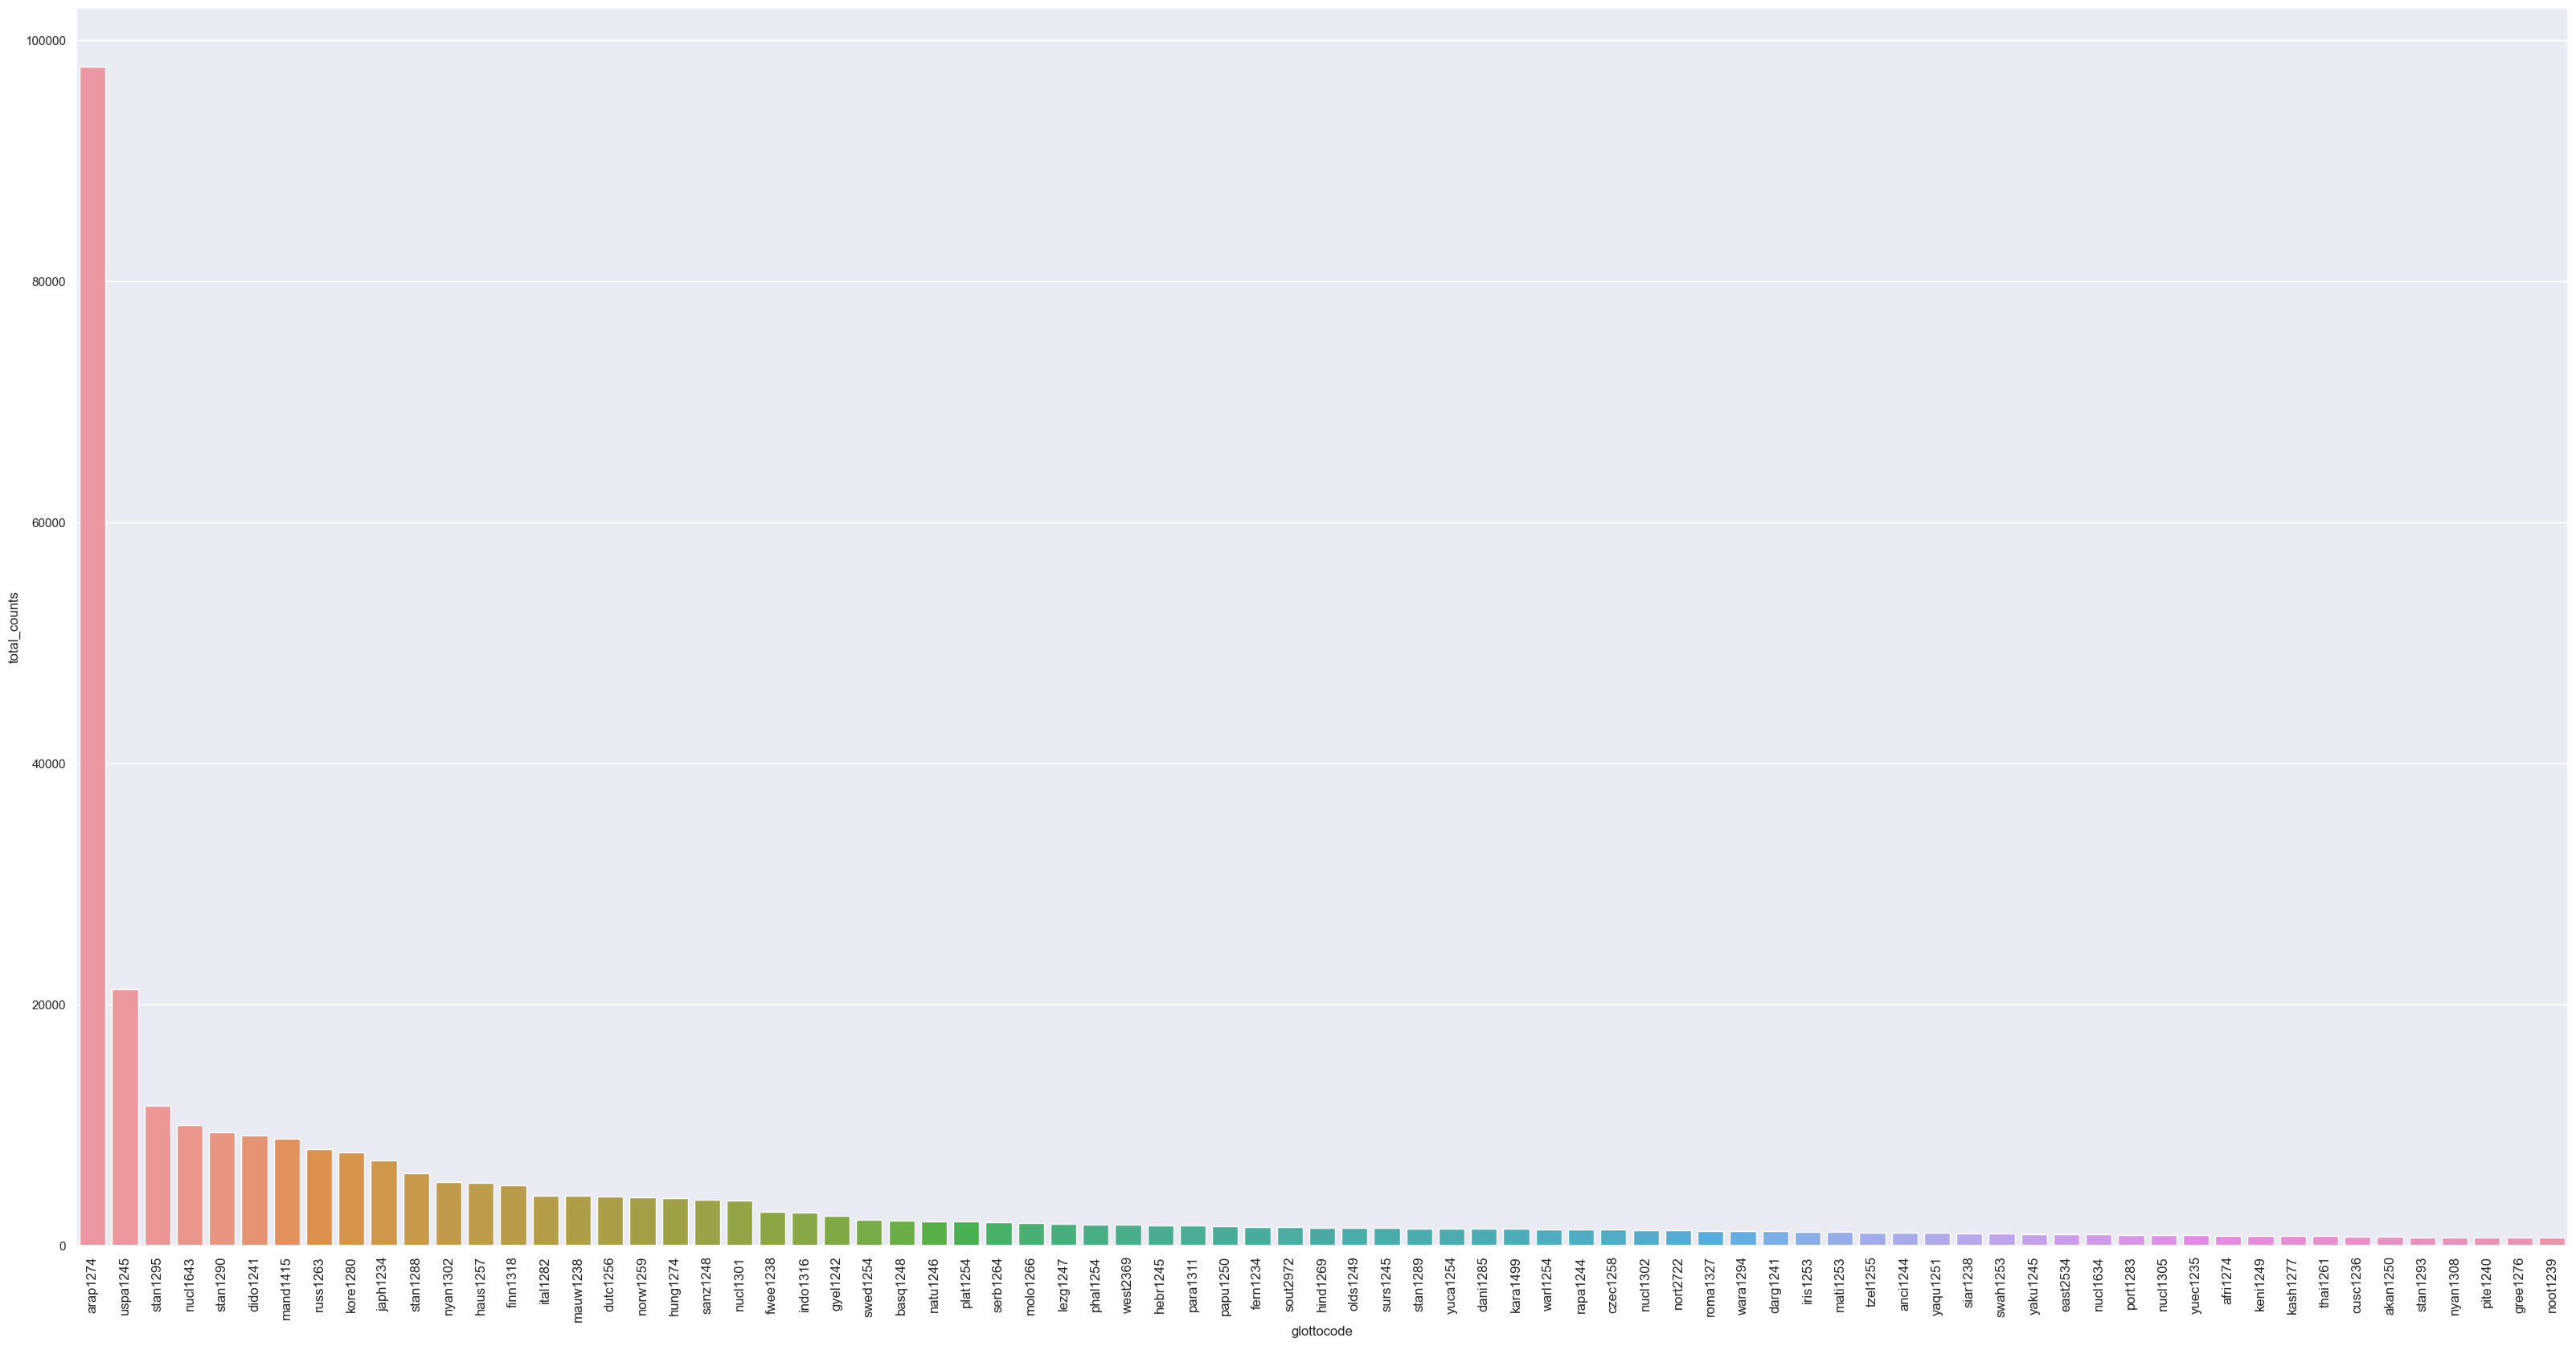

In [85]:
plt = sns.barplot(x=df_cutoff['glottocode'], y=df_cutoff['total_counts'], order=df_cutoff.sort_values('total_counts', ascending=False).glottocode)
plt.set_xticklabels(plt.get_xticklabels(), rotation=90, fontsize=12)

Quartile stats for number of samples across languages

In [86]:
print(glottocode_df['total_counts'].quantile([0.25, 0.5, 0.75]))


0.25     4.0
0.50    10.0
0.75    42.0
Name: total_counts, dtype: float64


Get language family info and plot by lang family

In [71]:
from pyglottolog import Glottolog

glottolog = Glottolog('../glottolog/', cache=True)

In [72]:
print(glottocode_df.head())

  glottocode  seg_counts  unseg_counts  unk_counts  total_counts
0   arap1274       48918         48918           0         97836
1   gitx1241         153           153          15           321
2   lezg1247         880           880           1          1761
3   natu1246         989           989           0          1978
4   nyan1302        2626          2626           0          5252


In [73]:
def get_lang_family(x):
    family = None
    languoid = glottolog.languoid(id_=x['glottocode'])
    if languoid is not None:
        family = str(languoid.family)
    return family

In [74]:
glottocode_df['family'] = glottocode_df.apply(lambda x: get_lang_family(x), axis=1)

In [76]:
print(glottocode_df)
glottocode_df.to_csv('resource_stats.csv', index=False)

     glottocode  seg_counts  unseg_counts  unk_counts  total_counts  \
0      arap1274       48918         48918           0         97836   
1      gitx1241         153           153          15           321   
2      lezg1247         880           880           1          1761   
3      natu1246         989           989           0          1978   
4      nyan1302        2626          2626           0          5252   
...         ...         ...           ...         ...           ...   
1717   arma1243           0             0           1             1   
1718   ussu1239           1             1           0             2   
1719   lali1241           1             1           0             2   
1720   sout2731           1             1           0             2   
1721   peri1253           8             8           4            20   

                            family  
0                 Algic [algi1248]  
1             Tsimshian [tsim1258]  
2     Nakh-Daghestanian [nakh1245]  

In [93]:
unique_families = glottocode_df['family'].unique()
seg_counts = []
unseg_counts = []
unk_counts = []
total_counts = []

for family in unique_families:
    family_df = glottocode_df[glottocode_df['family'] == family]
    seg_counts.append(family_df['seg_counts'].sum())
    unseg_counts.append(family_df['unseg_counts'].sum())
    unk_counts.append(family_df['unk_counts'].sum())
    total_counts.append(family_df['total_counts'].sum())
    
family_count_df = pd.DataFrame({'family': unique_families, 'seg_counts': seg_counts, 'unseg_counts': unseg_counts, 'unk_counts': unk_counts, 'total_counts': total_counts})
print(family_count_df.head())


                         family  seg_counts  unseg_counts  unk_counts  \
0              Algic [algi1248]       48976         49696           0   
1          Tsimshian [tsim1258]         156           158          15   
2  Nakh-Daghestanian [nakh1245]        8142          9098          53   
3       Austronesian [aust1307]        1908         14638        3484   
4     Atlantic-Congo [atla1278]        7598         13968        1105   

   total_counts  
0         98672  
1           329  
2         17293  
3         20030  
4         22671  


/Users/lindiatjuatja/opt/miniconda3/envs/wav2gloss/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lindiatjuatja/opt/miniconda3/envs/wav2gloss/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, 'Algic [algi1248]'),
 Text(1, 0, 'Indo-European [indo1319]'),
 Text(2, 0, 'Mayan [maya1287]'),
 Text(3, 0, 'Atlantic-Congo [atla1278]'),
 Text(4, 0, 'Sino-Tibetan [sino1245]'),
 Text(5, 0, 'Austronesian [aust1307]'),
 Text(6, 0, 'Nakh-Daghestanian [nakh1245]'),
 Text(7, 0, 'Afro-Asiatic [afro1255]'),
 Text(8, 0, 'Japonic [japo1237]'),
 Text(9, 0, 'Uralic [ural1272]'),
 Text(10, 0, 'Koreanic [kore1284]'),
 Text(11, 0, 'Turkic [turk1311]'),
 Text(12, 0, 'Nuclear Trans New Guinea [nucl1709]'),
 Text(13, 0, 'None'),
 Text(14, 0, 'Uto-Aztecan [utoa1244]'),
 Text(15, 0, 'Bookkeeping [book1242]'),
 Text(16, 0, 'Pama-Nyungan [pama1250]'),
 Text(17, 0, 'Tupian [tupi1275]'),
 Text(18, 0, 'Kartvelian [kart1248]'),
 Text(19, 0, 'West Bomberai [west2604]'),
 Text(20, 0, 'Yam [more1255]'),
 Text(21, 0, 'Cariban [cari1283]'),
 Text(22, 0, 'Quechuan [quec1387]'),
 Text(23, 0, 'Eskimo-Aleut [eski1264]'),
 Text(24, 0, 'Timor-Alor-Pantar [timo1261]'),
 Text(25, 0, 'Dravidian [drav1251]'),
 Te

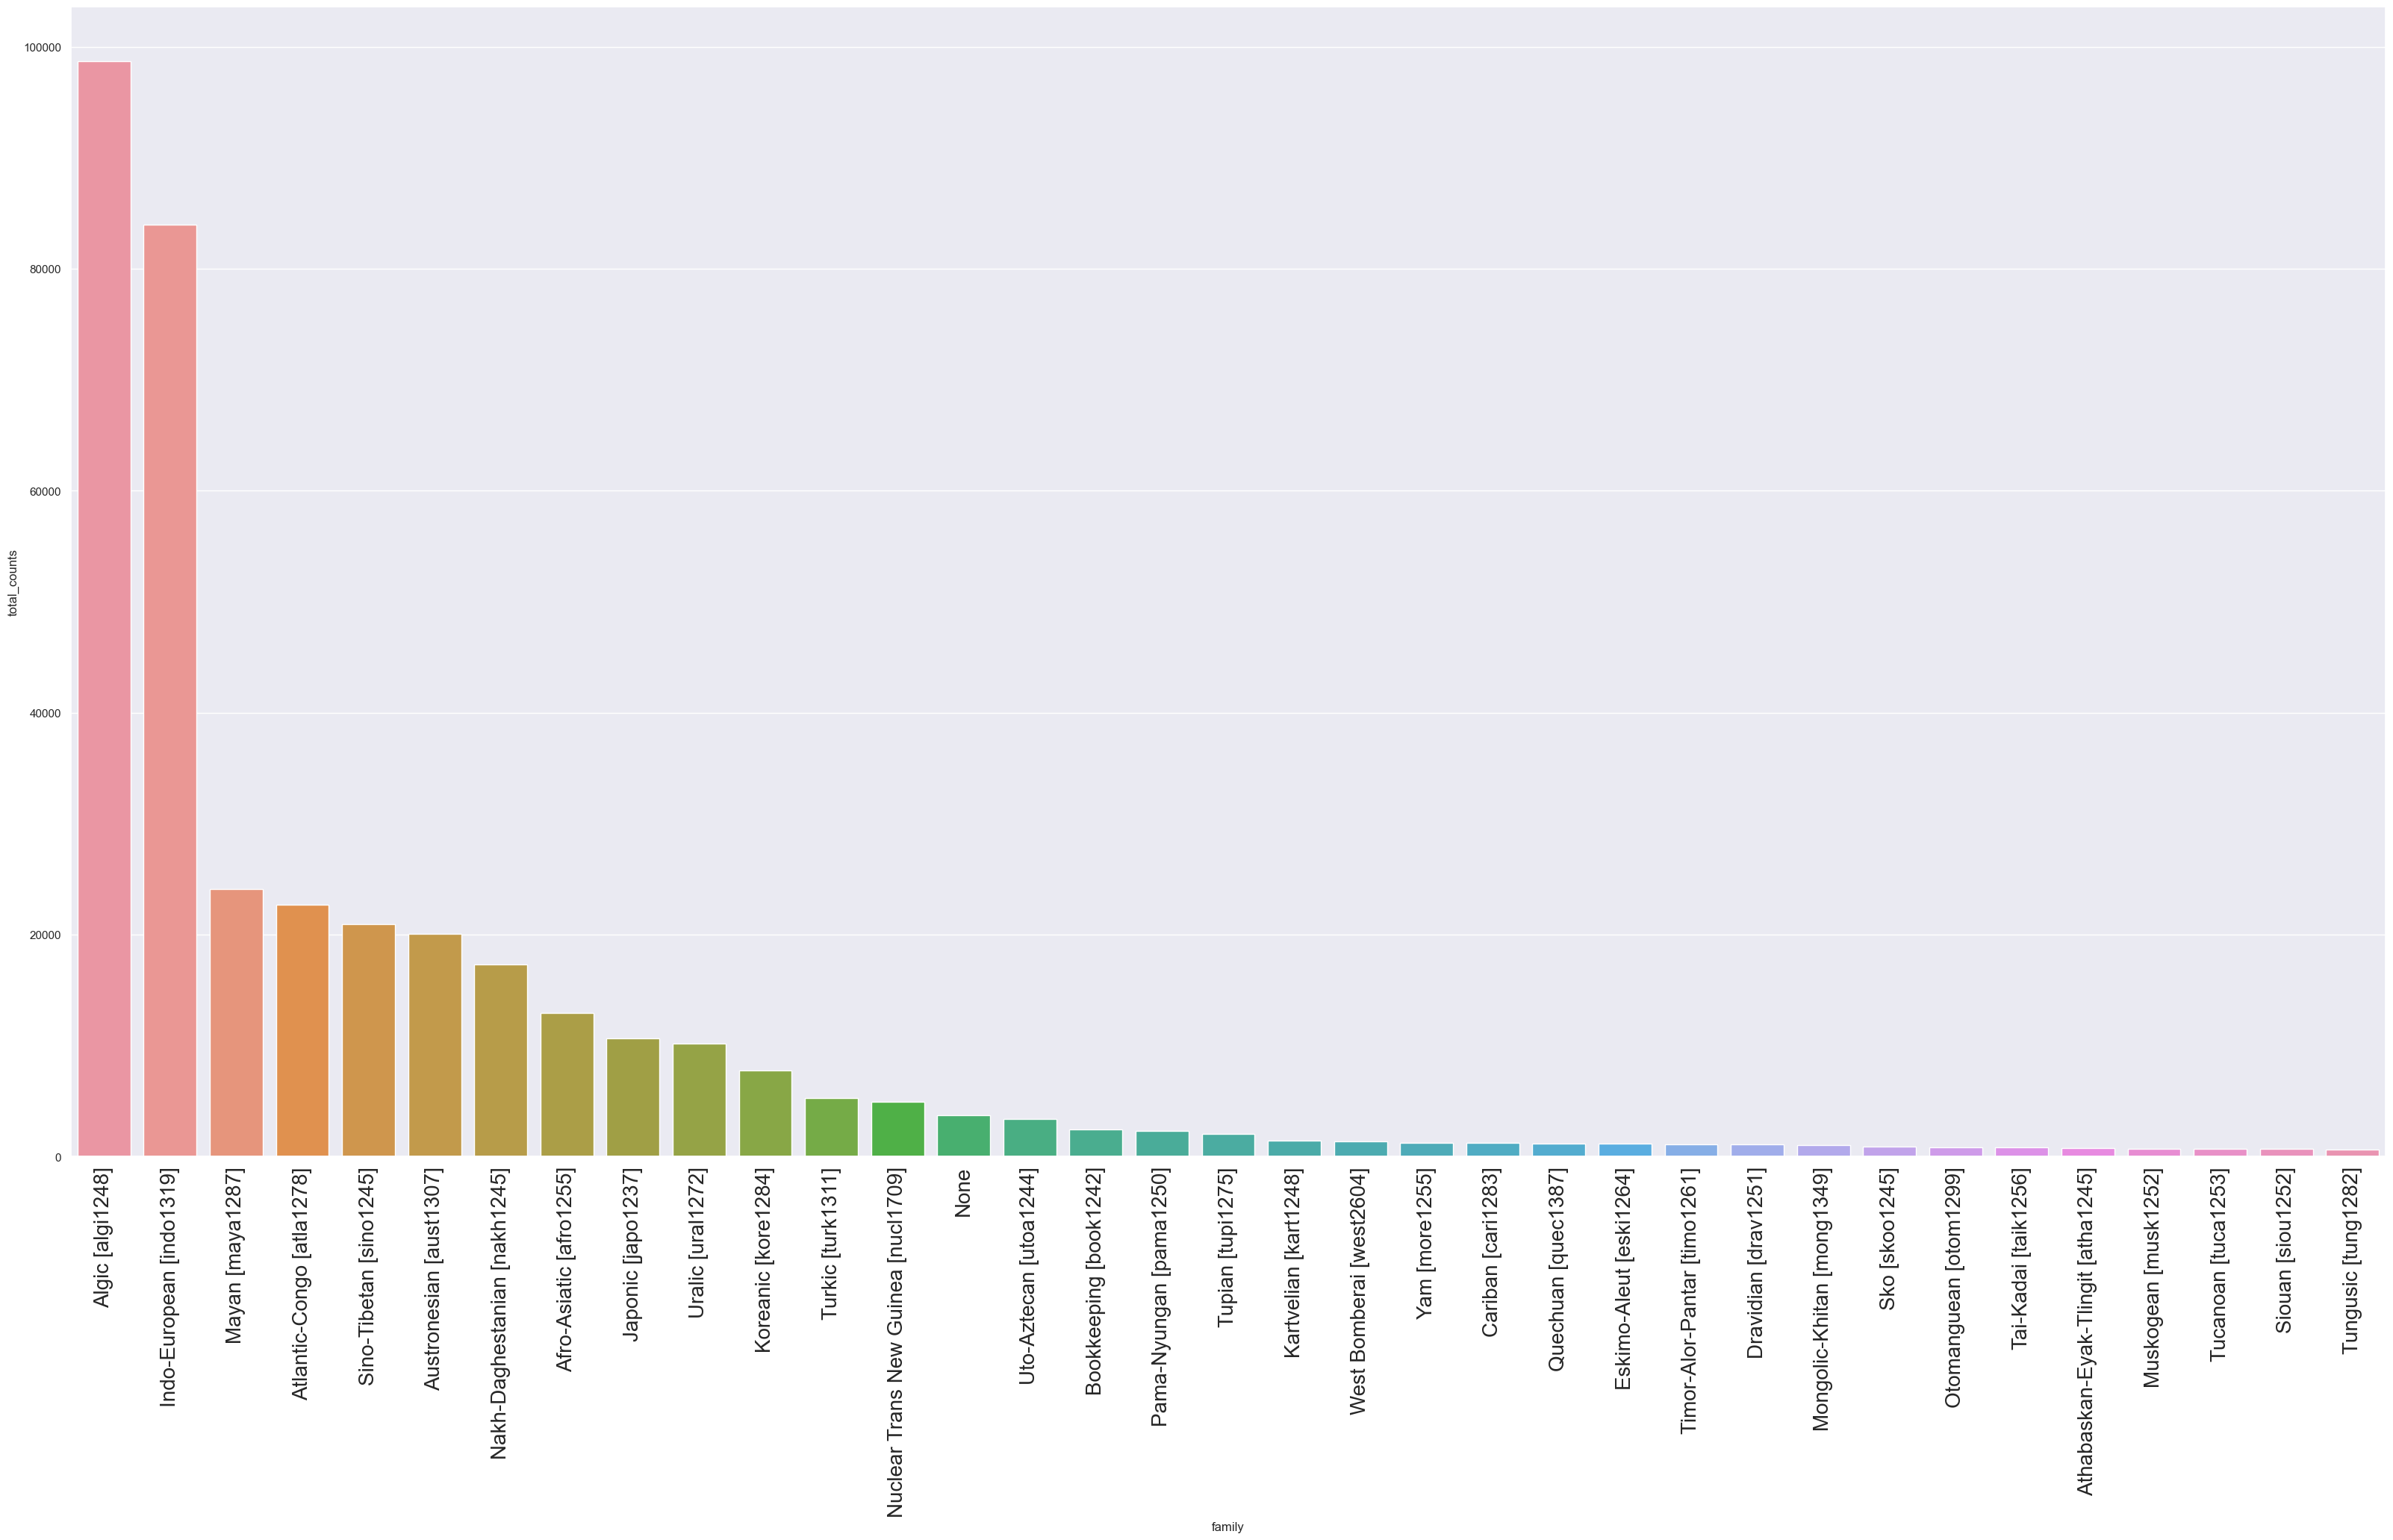

In [97]:
cutoff = 600
df_cutoff = family_count_df[family_count_df['total_counts'] > cutoff]

plt = sns.barplot(x=df_cutoff['family'], y=df_cutoff['total_counts'], order=df_cutoff.sort_values('total_counts', ascending=False).family)
plt.set_xticklabels(plt.get_xticklabels(), rotation=90, fontsize=20)

In [98]:
family_count_df.to_csv('resource_stats-family.csv', index=False)

In [104]:
no_family_df = glottocode_df[glottocode_df['family'] == 'None']
no_family_langs = no_family_df['glottocode'].unique()
print(no_family_langs)

['maib1239' 'garr1260' 'seri1257' 'buru1296' 'kute1249' 'klam1254'
 'trum1247' 'yura1255' 'abun1252' 'sand1273' 'wara1303' 'haid1248'
 'yana1271' 'fasu1242' 'tiwi1244' 'savo1255' 'yuch1247' 'kuna1268'
 'paez1247' 'basq1248' 'mose1249' 'iton1250' 'tequ1244' 'kaki1249'
 'inan1242' 'aust1307' 'atak1252' 'chit1248' 'natc1249' 'tuni1252'
 'sali1255' 'mand1469' 'krua1234' 'bilu1245' 'maya1287' 'kwaz1243'
 'aika1237' 'nyul1248' 'urar1246' 'yele1255' 'ural1272' 'aust1305'
 'indo1319' 'araw1282' 'kusu1250' 'timo1261' 'tung1282' 'barb1265'
 'ainu1252' 'nivk1234' 'yuka1259' 'utoa1244' 'sino1245' 'sepi1257'
 'burm1264' 'nort2933' 'namb1299' 'otom1299' 'anim1240' 'nilo1247'
 'bora1262' 'sout2772' 'koma1264' 'nakh1245' 'iroq1247' 'lavu1241'
 'chim1301' 'kore1284']
